In [74]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [23]:
df=pd.read_csv('laptop_data_cleaned.csv')

In [24]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [25]:
df.shape

(1273, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [27]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [28]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [29]:

# Data type corrections (convert 'TouchScreen', 'Ips' to category if needed)
df['TouchScreen'] = df['TouchScreen'].astype('category')
df['Ips'] = df['Ips'].astype('category')
df['Company'] = df['Company'].astype('category')
df['TypeName'] = df['TypeName'].astype('category')
df['Os'] = df['Os'].astype('category')

# Feature engineering: Creating 'Storage' column
df['Storage'] = df['HDD'] + df['SSD']

# Create Ppi_Category
df['Ppi_Category'] = pd.cut(df['Ppi'], bins=[0, 150, 200, 300], labels=['Low', 'Medium', 'High'])

# Price category
df['Price_Category'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Mid', 'High'])


In [40]:
df['TypeName'].value_counts()

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64

In [41]:
df.groupby('Company')['Price'].mean()

C:\Users\sparta\AppData\Local\Temp\ipykernel_980\3754498778.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Company
Acer         10.301821
Apple        11.274645
Asus         10.797073
Chuwi         9.683992
Dell         10.924479
Fujitsu      10.563592
Google       11.374981
HP           10.805129
Huawei       11.235397
LG           11.621737
Lenovo       10.779085
MSI          11.383340
Mediacom      9.645522
Microsoft    11.305010
Razer        11.940528
Samsung      11.173723
Toshiba      11.044669
Vero          9.351166
Xiaomi       10.995970
Name: Price, dtype: float64

## Univariate analysis

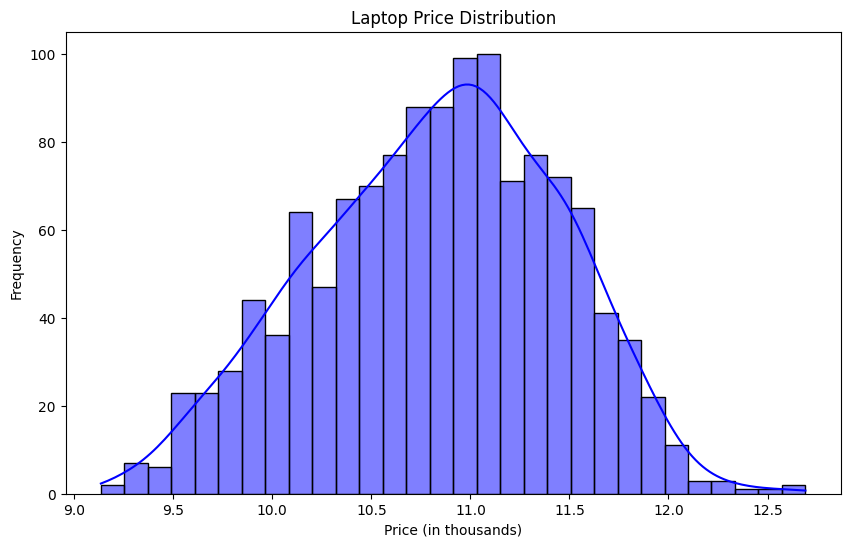

In [30]:
#price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Laptop Price Distribution')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()

C:\Users\sparta\AppData\Local\Temp\ipykernel_980\2441318703.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




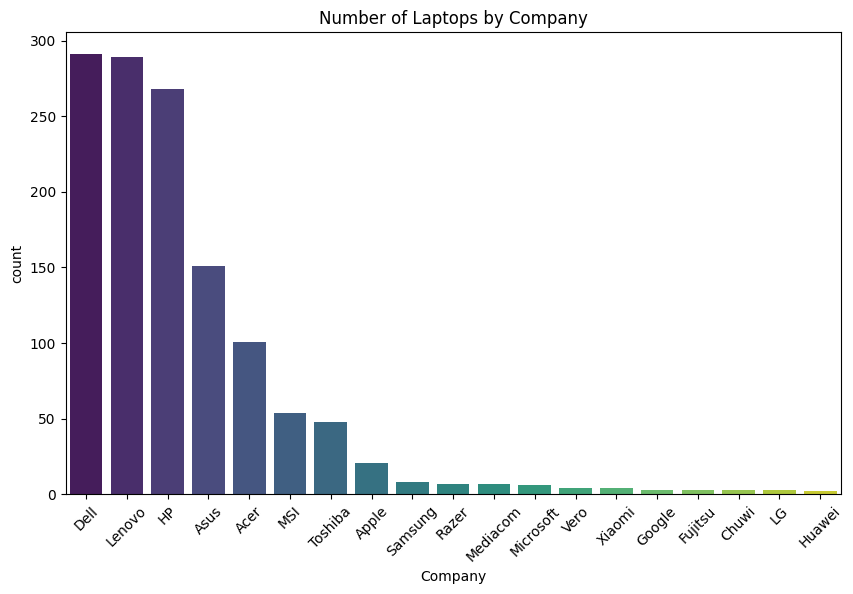

In [31]:
#laptop kind by brand
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index, palette='viridis')
plt.title('Number of Laptops by Company')
plt.xticks(rotation=45)
plt.show()


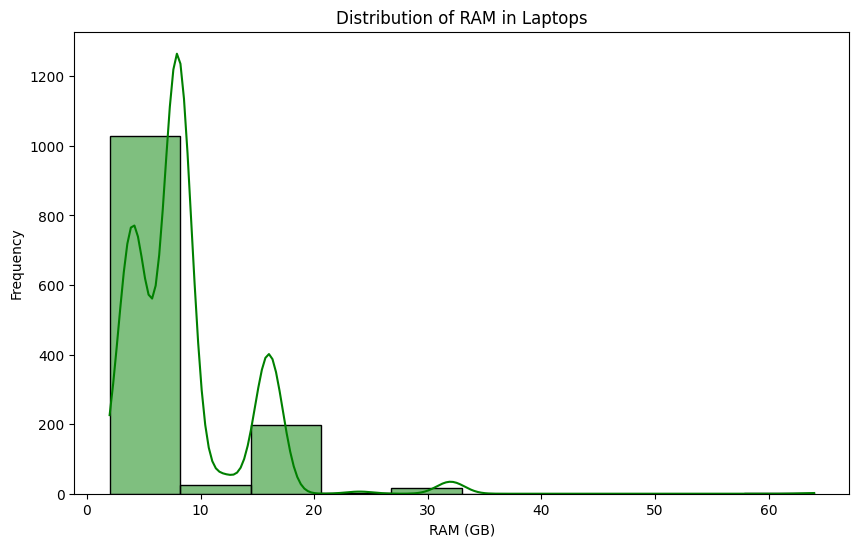

In [32]:
#ram distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Ram'], bins=10, kde=True, color='green')
plt.title('Distribution of RAM in Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Frequency')
plt.show()


C:\Users\sparta\AppData\Local\Temp\ipykernel_980\374048956.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




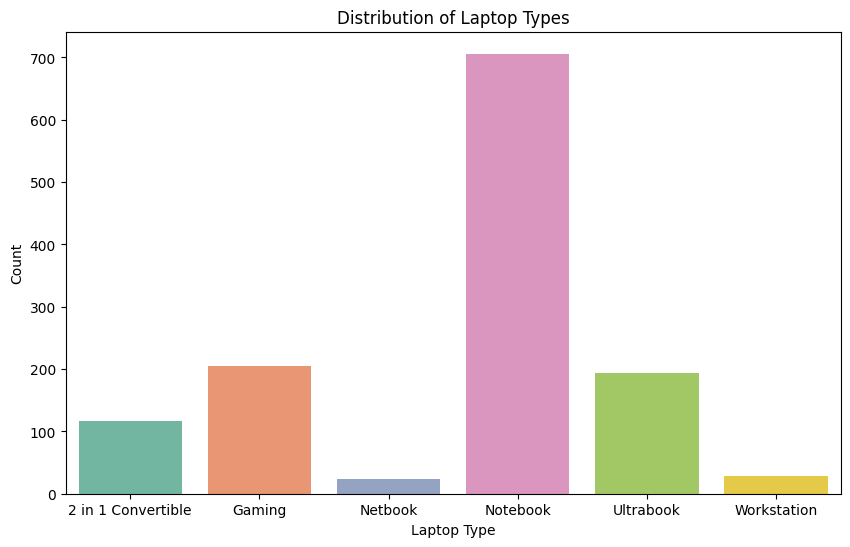

In [46]:
# Count of each laptop type
plt.figure(figsize=(10, 6))
sns.countplot(x='TypeName', data=df, palette='Set2')
plt.title('Distribution of Laptop Types')
plt.xlabel('Laptop Type')
plt.ylabel('Count')
plt.show()


## Bivariate analysis

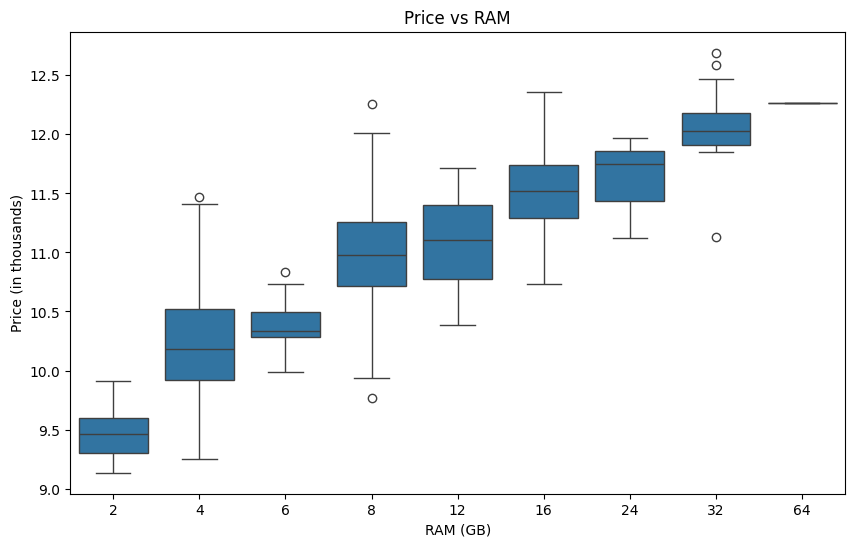

In [33]:
#ram vs price
plt.figure(figsize=(10,6))
sns.boxplot(x='Ram', y='Price', data=df)
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (in thousands)')
plt.show()


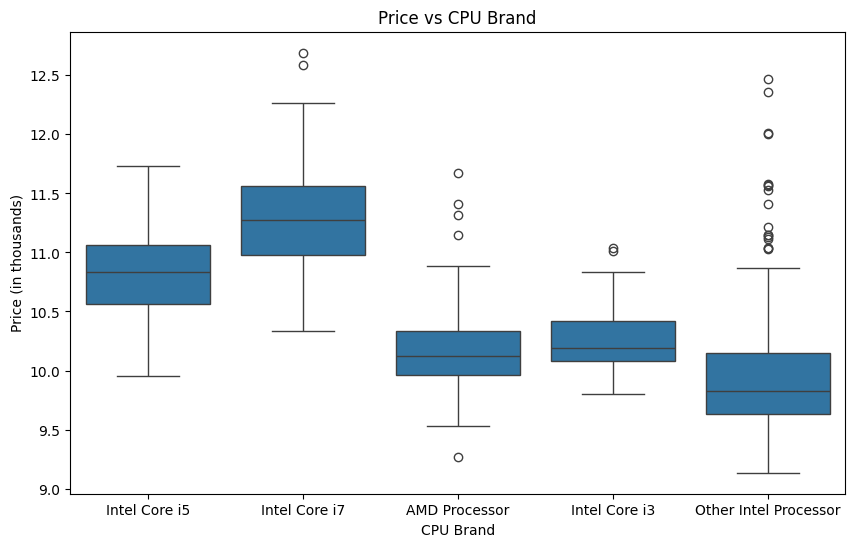

In [34]:
#price vs cpu brand
plt.figure(figsize=(10,6))
sns.boxplot(x='Cpu_brand', y='Price', data=df)
plt.title('Price vs CPU Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Price (in thousands)')
plt.show()


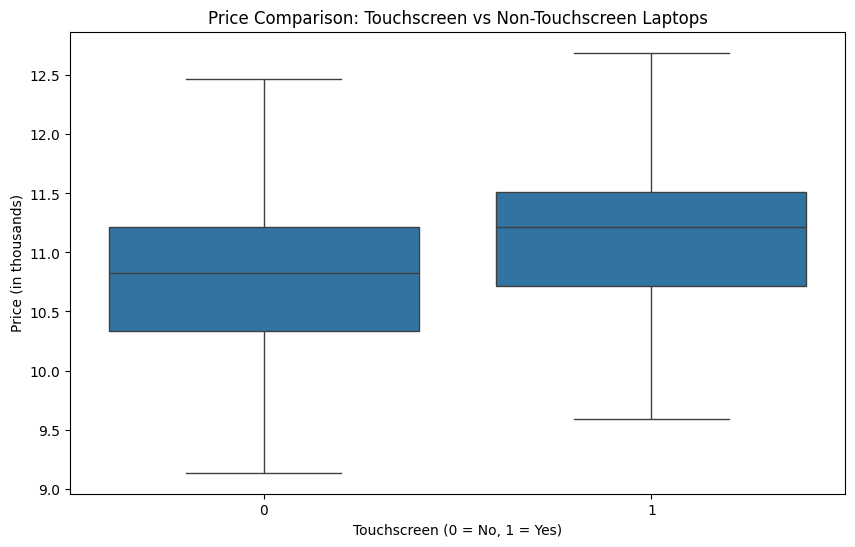

In [35]:
#price vs touch screen
plt.figure(figsize=(10,6))
sns.boxplot(x='TouchScreen', y='Price', data=df)
plt.title('Price Comparison: Touchscreen vs Non-Touchscreen Laptops')
plt.xlabel('Touchscreen (0 = No, 1 = Yes)')
plt.ylabel('Price (in thousands)')
plt.show()


C:\Users\sparta\AppData\Local\Temp\ipykernel_980\2306696269.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



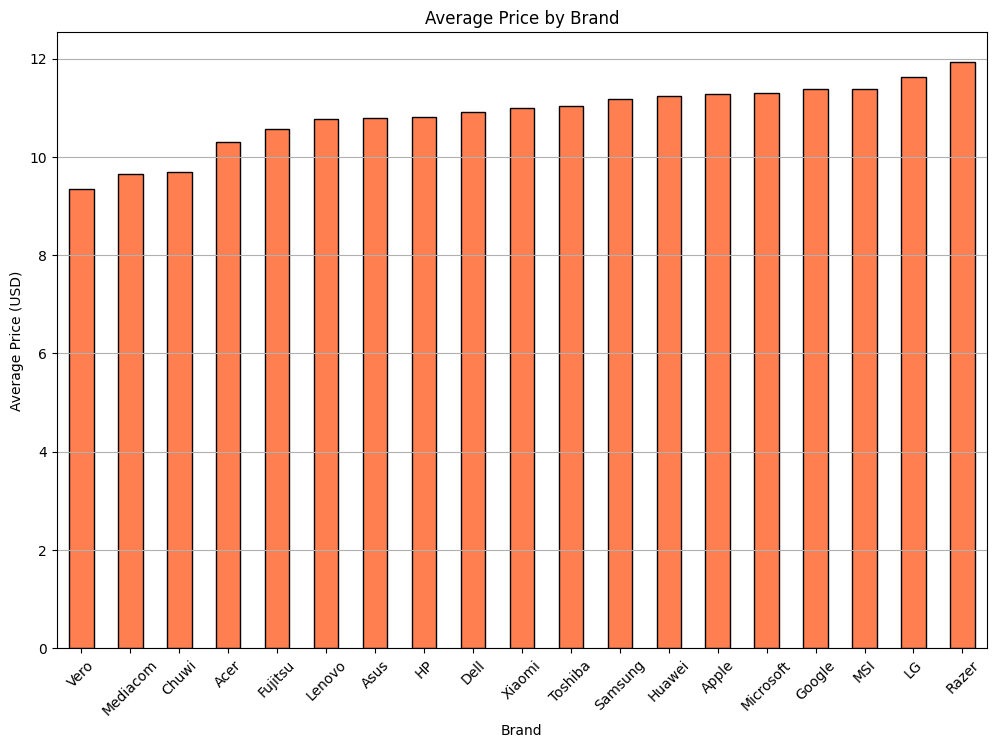

In [42]:
# Average price by brand
avg_price_by_brand = df.groupby('Company')['Price'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_price_by_brand.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


## Multivariate Analysis

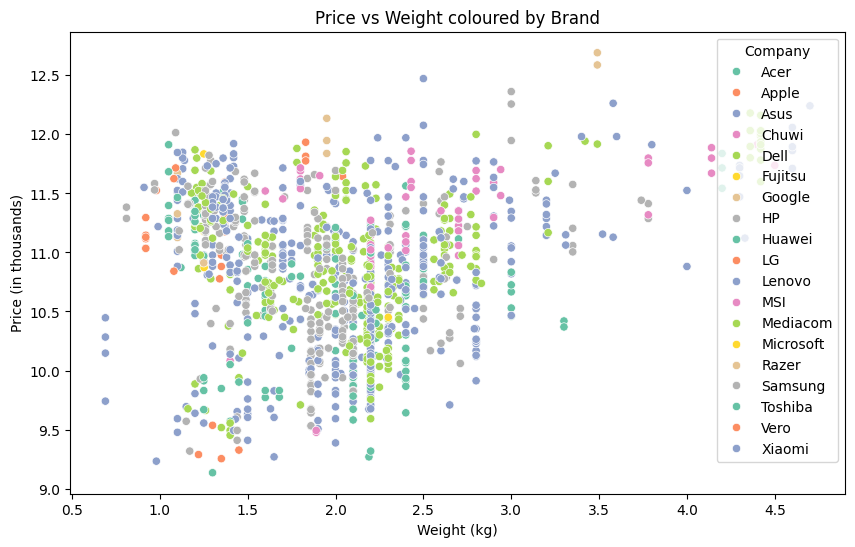

In [36]:
#Price vs Weight colored by Brand
plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight', y='Price', hue='Company', data=df, palette='Set2')
plt.title('Price vs Weight coloured by Brand')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (in thousands)')
plt.show()


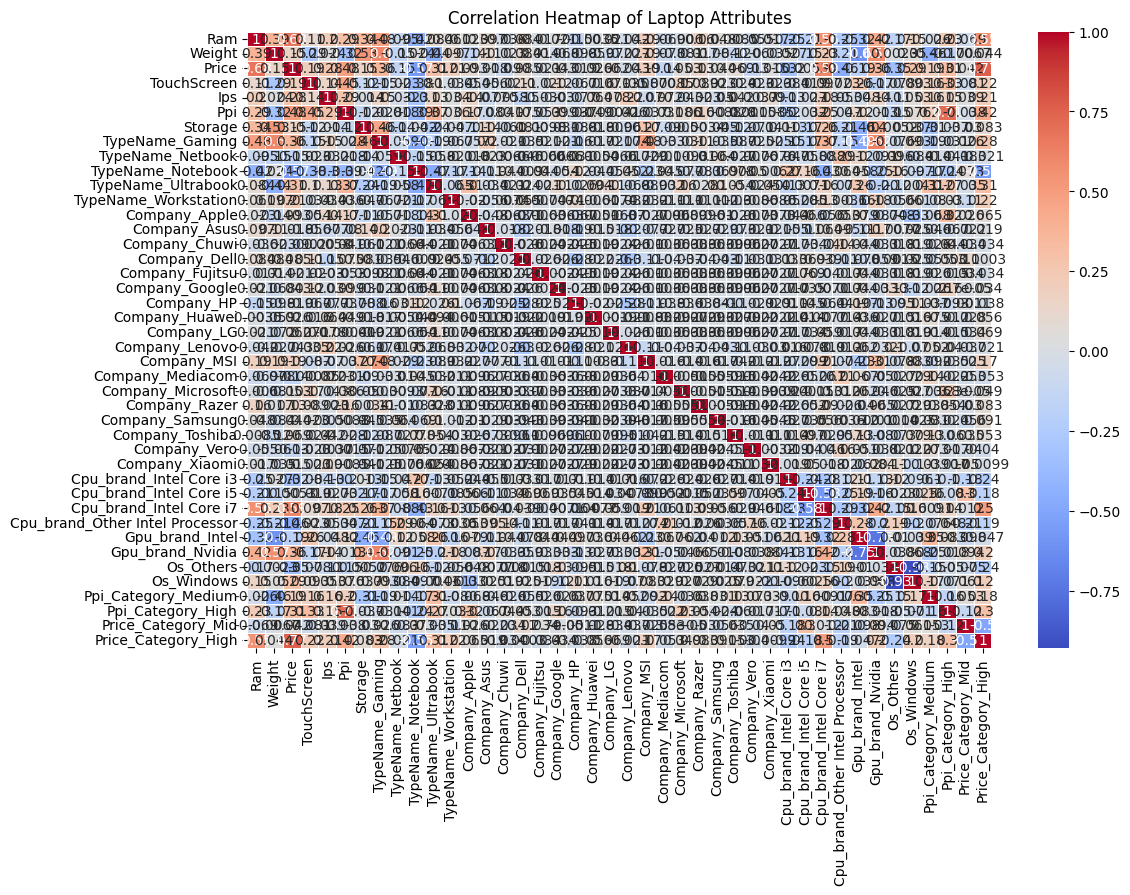

In [37]:
# Create 'Storage' column as the sum of HDD and SSD
df['Storage'] = df['HDD'] + df['SSD']

# Drop HDD and SSD columns (they are now redundant)
df.drop(columns=['HDD', 'SSD'], inplace=True)

# Handle categorical features: Convert all categorical columns to dummy variables
df_encoded = pd.get_dummies(df, columns=['TypeName', 'Company', 'Cpu_brand', 'Gpu_brand', 'Os', 'Ppi_Category', 'Price_Category'], drop_first=True)

# Normalize/scale continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['Weight', 'Ram', 'Storage', 'Ppi']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Laptop Attributes')
plt.show()


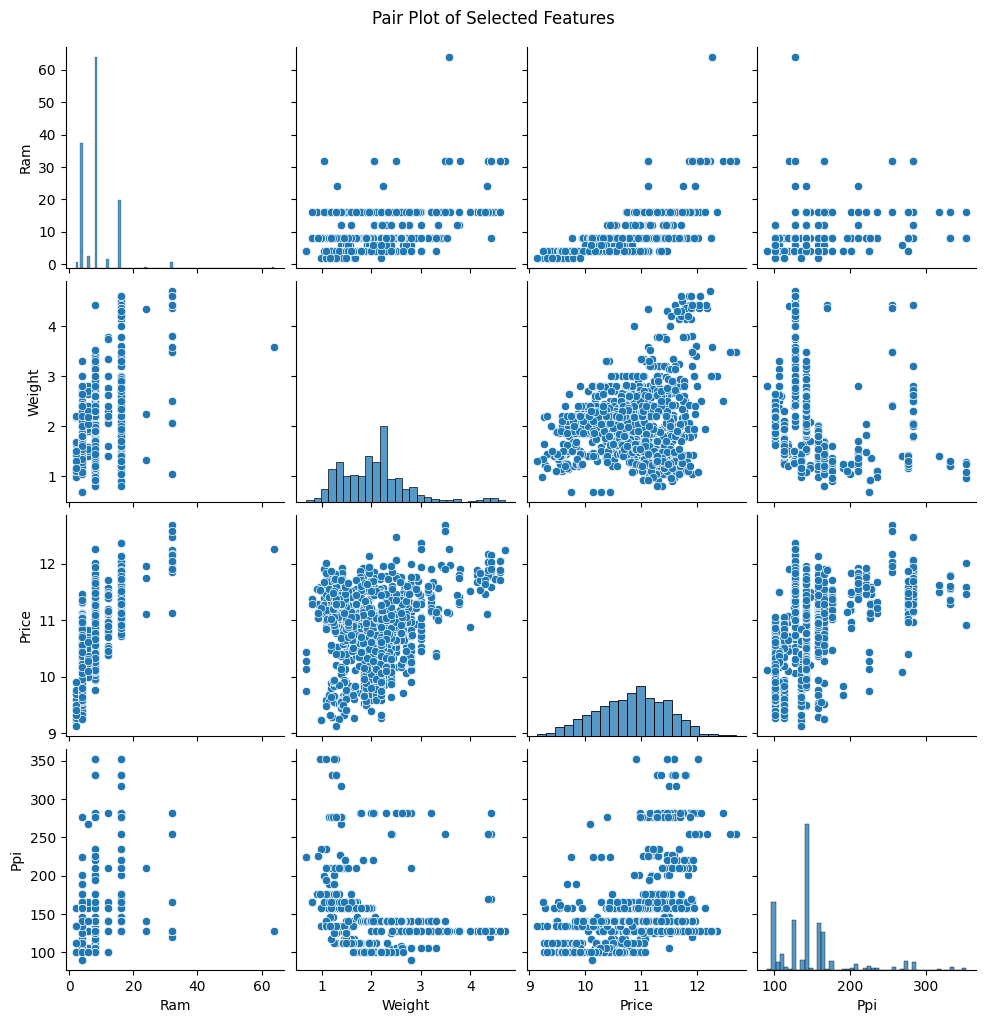

In [45]:
# Pair plot of selected features
sns.pairplot(df[['Ram', 'Weight', 'Price', 'Ppi']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


## Pie Chart for Operating Systems

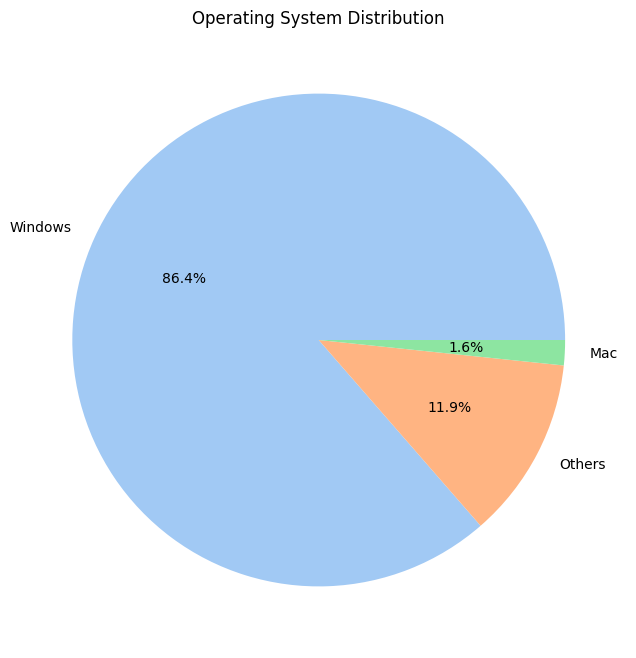

In [38]:
os_counts = df['Os'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(os_counts, labels=os_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Operating System Distribution')
plt.show()


In [39]:
fig = px.scatter_3d(df, x='Ram', y='Price', z='Weight', color='Company', size='Storage',
                    title="3D Plot: RAM vs Price vs Weight",
                    labels={'Ram':'RAM (GB)', 'Price':'Price (in thousands)', 'Weight':'Weight (kg)'})
fig.show()


###  Comparative Analysis
Average Specifications by Brand

In [58]:
# Average specifications by brand
avg_specs_by_brand = df.groupby('Company').agg({
    'Ram': 'mean',
    'Weight': 'mean',
    'Price': 'mean',
    'Ppi': 'mean'
})
print(avg_specs_by_brand)


                 Ram    Weight      Price         Ppi
Company                                              
Acer        6.019802  2.162277  10.301821  126.638825
Apple       9.333333  1.320476  11.274645  202.301704
Asus        9.801325  2.234377  10.797073  137.583440
Chuwi       4.666667  1.726667   9.683992  183.254144
Dell        9.230241  2.144574  10.924479  152.856737
Fujitsu     6.666667  2.233333  10.563592  100.454670
Google     10.666667  1.100000  11.374981  234.507400
HP          6.962687  1.913806  10.805129  143.847152
Huawei      8.000000  1.050000  11.235397  199.692071
LG         10.666667  1.050000  11.621737  146.591503
Lenovo      8.055363  2.007889  10.779085  149.032210
MSI        13.037037  2.660556  11.383340  139.446724
Mediacom    3.714286  1.337143   9.645522  164.992422
Microsoft   8.000000  1.251333  11.305010  200.842560
Razer      19.428571  2.195714  11.940528  240.903504
Samsung    11.500000  1.336250  11.173723  151.723000
Toshiba     8.666667  1.6402

C:\Users\sparta\AppData\Local\Temp\ipykernel_980\225985207.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [59]:
# Interactive scatter plot of RAM vs. Price
fig = px.scatter(df, x='Ram', y='Price', color='TypeName', 
                 size='Weight', hover_data=['Company', 'Cpu_brand'],
                 title='Interactive Scatter Plot of RAM vs. Price')
fig.update_layout(xaxis_title='RAM (GB)', yaxis_title='Price (USD)')
fig.show()

### Distribution with Kernel Density Estimate (KDE)
KDE Plot of Price by Laptop Type

C:\Users\sparta\AppData\Local\Temp\ipykernel_980\89306223.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\sparta\AppData\Local\Temp\ipykernel_980\89306223.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




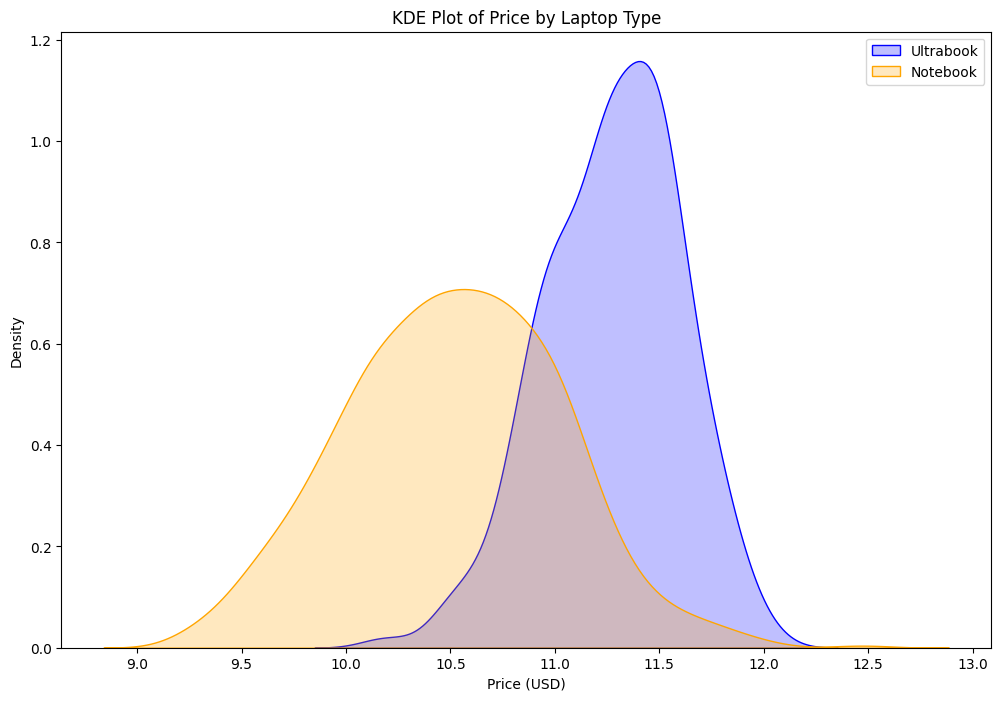

In [60]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df[df['TypeName'] == 'Ultrabook']['Price'], shade=True, label='Ultrabook', color='blue')
sns.kdeplot(df[df['TypeName'] == 'Notebook']['Price'], shade=True, label='Notebook', color='orange')
plt.title('KDE Plot of Price by Laptop Type')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.legend()
plt.show()


### Feature Importance Analysis
Feature Importance using Random Forest

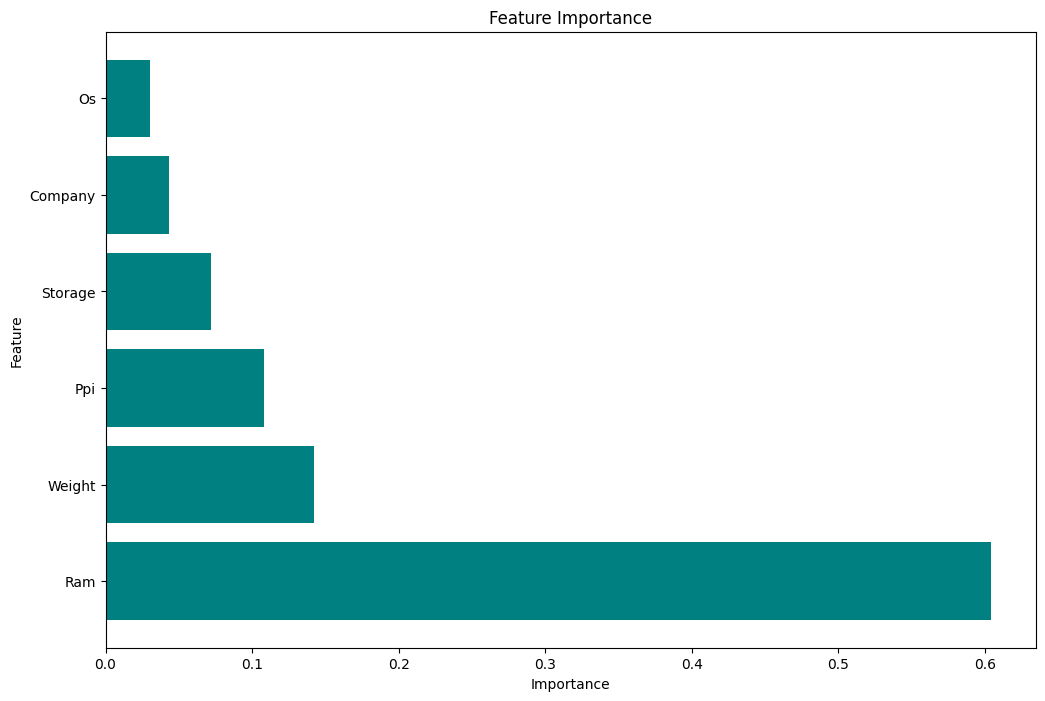

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Handle missing values and feature scaling
X = df[['Ram', 'Weight', 'Ppi','Storage', 'Company', 'Os']]
y = df['Price']

# Encode categorical data
label_encoder = LabelEncoder()
df['TypeName'] = label_encoder.fit_transform(df['TypeName'])
df['Company'] = label_encoder.fit_transform(df['Company'])
df['Os'] = label_encoder.fit_transform(df['Os'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importance = model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(features, importance, color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



### Pairwise Correlation Plot with Seaborn
Correlation Matrix with Annotations

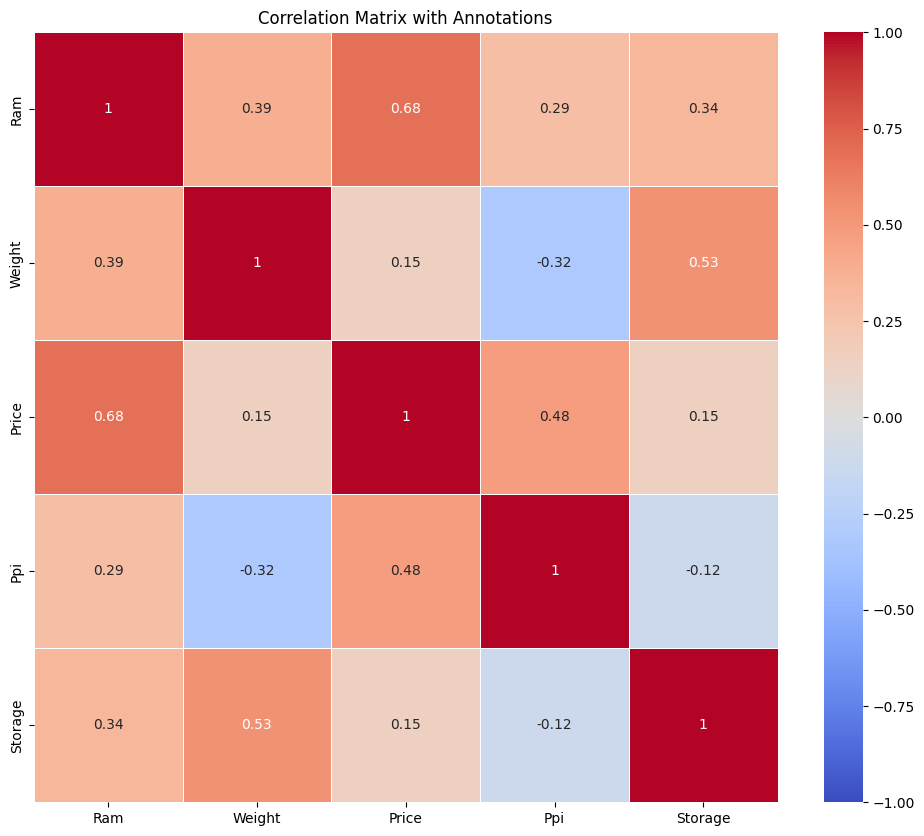

In [65]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Ram', 'Weight', 'Price', 'Ppi', 'Storage']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Matrix with Annotations')
plt.show()


### Dimensionality Reduction and Visualization
Principal Component Analysis (PCA) for Feature Reduction

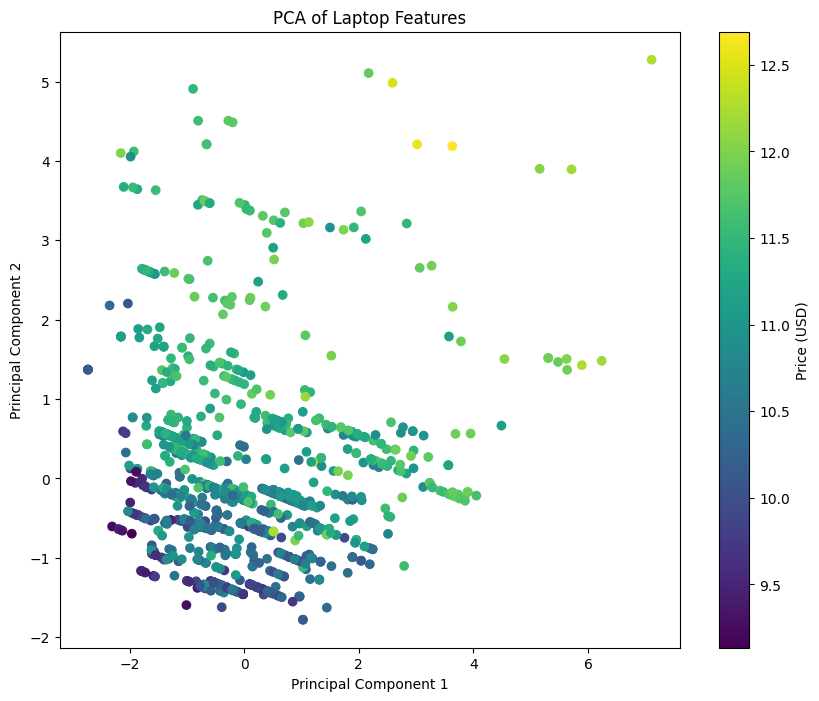

In [69]:
from sklearn.decomposition import PCA

# Prepare data for PCA
features = ['Ram', 'Weight', 'Ppi', 'Storage']
X = df[features].fillna(0)

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Price'], cmap='viridis')
plt.colorbar(scatter, label='Price (USD)')
plt.title('PCA of Laptop Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Violin Plot for Detailed Distribution Analysis
Violin Plot of Price by CPU Brand

C:\Users\sparta\AppData\Local\Temp\ipykernel_980\613831239.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




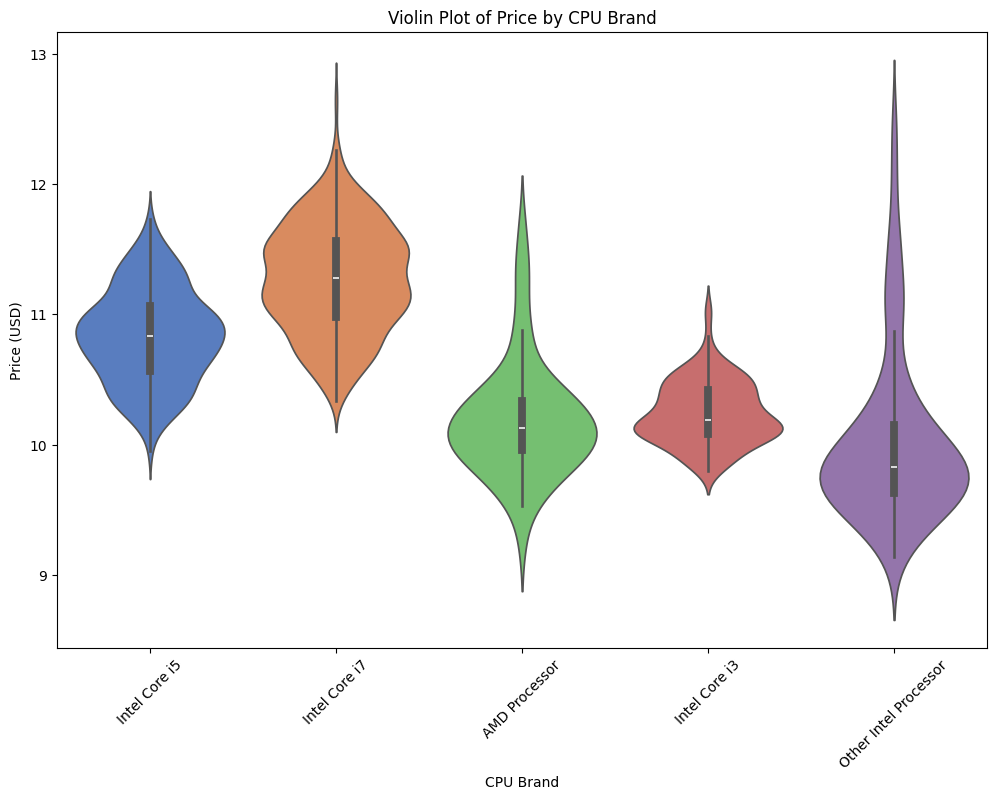

In [71]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Cpu_brand', y='Price', data=df, palette='muted')
plt.title('Violin Plot of Price by CPU Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

###  Cluster Analysis
K-Means Clustering of Laptops

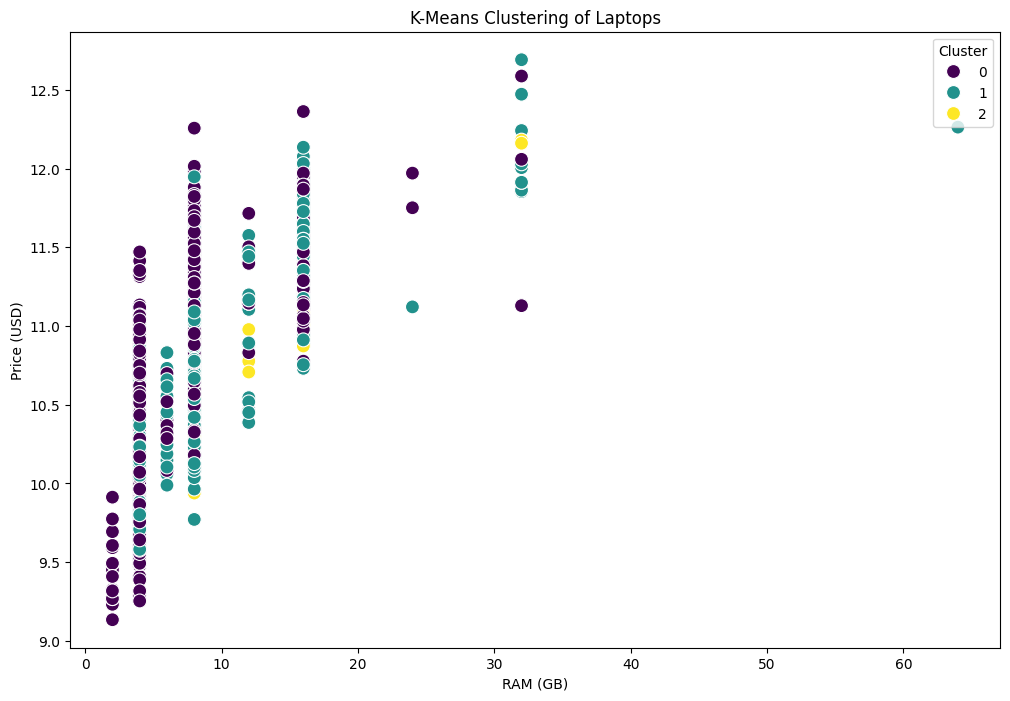

In [73]:
from sklearn.cluster import KMeans

# Prepare data for clustering
X = df[['Ram', 'Weight', 'Price', 'Ppi', 'Storage']].fillna(0)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Ram', y='Price', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering of Laptops')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (USD)')
plt.show()

###  Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = model_lr.predict(X_test)
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
Mean Squared Error: 0.17996343480705734
R2 Score: 0.5446620857415532


### DecisionTreeRegressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

# Train the model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = model_dt.predict(X_test)
print("Decision Tree Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))


Decision Tree Regression:
Mean Squared Error: 0.12920945050109062
R2 Score: 0.6730782463853072


###  RandomForestRegressor

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = model_rf.predict(X_test)
print("Random Forest Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regression:
Mean Squared Error: 0.07501630932903329
R2 Score: 0.8101960553160714


### Support Vector Regression

In [82]:
from sklearn.svm import SVR

# Train the model
model_svr = SVR()
model_svr.fit(X_train, y_train)

# Predict and evaluate
y_pred_svr = model_svr.predict(X_test)
print("Support Vector Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))


Support Vector Regression:
Mean Squared Error: 0.18555560045215388
R2 Score: 0.5305129612610388
